## Demonstration of the package

This notebook serves as the project report. It demonstrates examples of the primary functions available in the toolbox. For each function, the input parameters, their physical meanings, and the returned parameters are explained.

## Goal of the project

The primary objective of this project, which is part of the CH-200 course for second-year bachelor's students in Chemistry and Chemical Engineering at EPFL, is to automate tasks that are time-consuming. For instance, one function in this project allows users to input a chemical reaction in string form, and the code will compute the stoichiometric coefficients and return various properties of the reactants and products. Additionally, by simply entering the name of a molecule, users can obtain its safety data sheet without the need to search through supplier websites manually. Other functions are also implemented as you will discover in the example contained in this notebook.

### Distillation
This function calculates the number of stages required for a distillation process based on given separation properties. It also generates a McCabe-Thiele diagram to visually represent the stages.

<div>
<figure>
<img src="./Images/distillation_column.png" height="450"/>
  <figcaption><b>Figure 1.</b> Schematic representation of a distillation column</figcaption>
</figure>
</div>

Parameters:
- F (float): Feed flow rate (mol/hr)
- R (float): Reflux ratio
- z (float): Feed composition (mole fraction)
- q (float): Feed quality (ratio of liquid to total feed)
- alpha (float): Relative volatility
- xD (float): Distillate composition (mole fraction)
- D (float): Distillate flow rate (mol/hr)

Returns:
- nb_stages (int): Number of stages required
- fig (matplotlib Figure): McCabe-Thiele diagram
Example of Use:

Number of stages required: 3


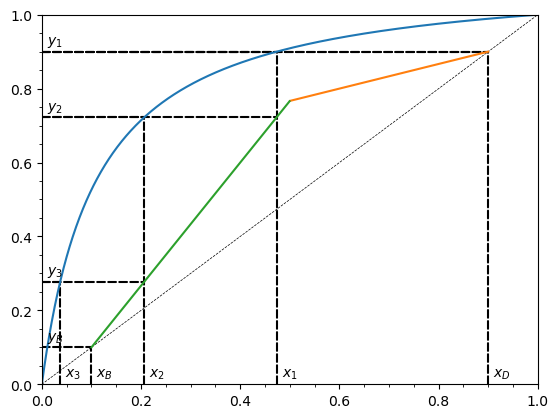

In [2]:
from Toolbox.Distillation import distillation
import matplotlib.pyplot as plt

nb_stages, fig = distillation(F=100, R=0.5, z=0.5, q=1, alpha=10, xD=0.9, D=50)

print(f'Number of stages required: {nb_stages}')
plt.show()

### Chemical Reaction
This part provides functionality for working with chemical elements and reactions. It allows users to initialize chemical elements, retrieve their properties, perform stoichiometric calculations for chemical reactions, and visualize molecules and reactions.

Parameters:
- rxn_str (str): a string containing the reaction

Returns:
- properties (pandas dataframe): a dataframe containing the properties of the reactants and the products and their stoichiometric coefficient
- fig (matplotlib Figure): a figure of the reaction


The properties returned are for each element:
- Stoichiometric coefficients (coefficient are negative and positive for the product)
- Molecular weight in [g/mol]
- IUPAC name
- SMILE
- Monoisotopic mass [g/mol]
- Number of H bond donors
- Number of H bond acceptors
- XlogP


\
**Remark**:\
The chemicals specified in the reaction string might be ambiguous for the database the package uses to convert them into SMILES. If you encounter the error "Compound {name} not found," try using the English name of the compound (e.g., use "water" for H2O).

Example of use:

   Stoichiometry MolecularWeight         IUPACName CanonicalSMILES  \
0           -1.0          39.997  sodium;hydroxide     [OH-].[Na+]   
1           -1.0           36.46          chlorane              Cl   
2            1.0           58.44   sodium;chloride     [Na+].[Cl-]   
3            1.0          18.015           oxidane               O   

  MonoisotopicMass  HBondDonorCount  HBondAcceptorCount  XLogP  
0      39.99250893                1                   1    NaN  
1       35.9766777                1                   0    0.8  
2       57.9586220                0                   1    NaN  
3     18.010564683                1                   1   -0.5  


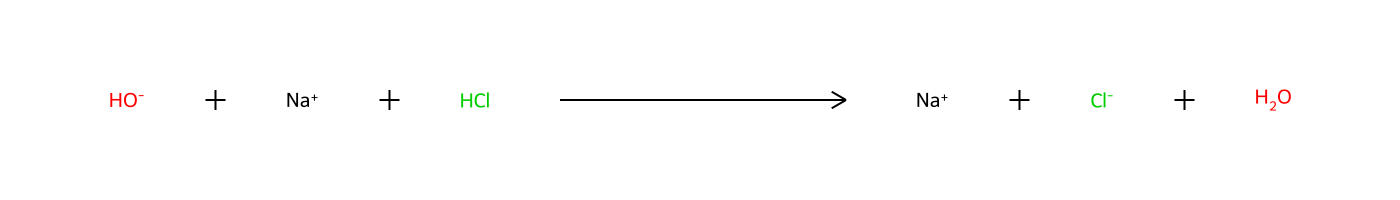

In [3]:
from Toolbox.chemical_rxn import equation

rxn = equation("NaOH + HCl -> NaCl + H2O")

properties_df = rxn.get_reaction_properties()

print(properties_df)

rxn.draw_reaction()

**Remark**:\
The algorithm used to solve the matrix to find the stoichiometric coefficient is an evolution of Gauss Elimination method. However, as it is implemented, it can not solve any systems. It can solve only system which has the form $$\bf{A}\cdot x = b$$ where b is a column vector containing only 0.

This part of the project can also be used to obtain some properties on chemicals.

In [4]:
from Toolbox.chemical_rxn import elements

el = elements("NaOH")

print(el.properties)

{'CID': 14798, 'MolecularWeight': '39.997', 'CanonicalSMILES': '[OH-].[Na+]', 'IUPACName': 'sodium;hydroxide', 'MonoisotopicMass': '39.99250893', 'HBondDonorCount': 1, 'HBondAcceptorCount': 1}


As explained before, sometimes the chemical formula of the product/reactant is ambiguous to find the element that the user wanted to write in the reaction or the database find unrelated molecules. For example

In [5]:
el = elements("NO")

print(el.properties)

{'CID': 24822, 'MolecularWeight': '259.10100', 'CanonicalSMILES': '[No]', 'IUPACName': 'nobelium', 'MonoisotopicMass': '259.10100', 'HBondDonorCount': 0, 'HBondAcceptorCount': 0}


This is a case where the code returns nobelium instead of nitric oxide. So, for certain reactions, if the properties of the molecules/smiles do not correspond to the element you are looking for, try writing the name in English or the IUPAC name:

In [6]:
el = elements("Nitrogen monoxide")

print(el.properties)

{'CID': 145068, 'MolecularWeight': '30.006', 'CanonicalSMILES': '[N]=O', 'IUPACName': 'nitric oxide', 'XLogP': 0.2, 'MonoisotopicMass': '29.997988624', 'HBondDonorCount': 0, 'HBondAcceptorCount': 1}


### Liquid-Liquid Extraction (LLE)

This part of the project is used to calculate the number of stages required for this type of separation. In this part, two different type of separation processes are implemented: cross-flow and counter-flow imiscible LLE. For both, we assume that the dilute case is valid. Thus,
- the equilibrium constant $k_D$ is constant over the whole system
- the feed/raffinate flow rate $R$ is constant between the inlet and outlet
- the extract/solvent flow rate $E$ is constant between the inlet and outlet

For the counter-flow, the inputs are
- R (float): the feed/raffinate flow
- E (float): the solvent/extract feed flow
- yN_1 (float between 0 and 1): the fraction of the product in the solvent inlet
- x0 (float between o and 1): the fraction of the product in the inlet feed
- xN (float between o and 1): the fraction of the product in the outlet feed
- kD (float): the equilibrium constant for the element between the two phases


</br></br>
<div>
<figure>
<img src="./Images/lle_counter_flow.png" height="200"/>
  <figcaption><b>Figure 2.</b> Schematic representation of a counter-flow extraction column</figcaption>
</figure>
</div>
</br>
An example is provided below.

Number of stages required: 5


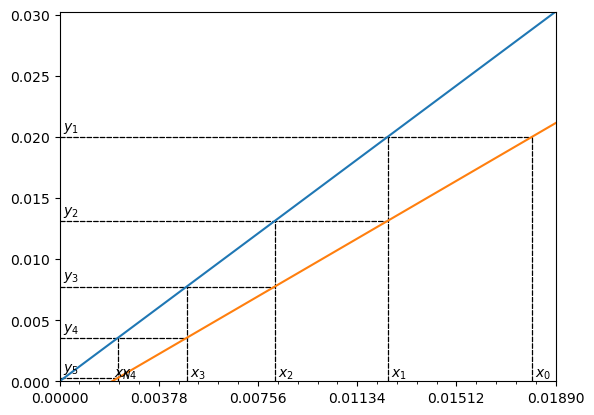

In [7]:
import Toolbox.LLE as tl

fig, nb_stages = tl.lle(R=100, E = 80, yN_1 = 0, xN = 0.002, x0 = 0.018, kD = 1.6)

print(f'Number of stages required: {nb_stages}')

For the cross-flow separation, it was assumed that the concentration of the solvent at each stage was constant and equal to the same mole fraction.

Parameters:
- R (float): the feed/raffinate flow
- E (float): the solvent/extract feed flow
- y_in (float between 0 and 1): the fraction of the product in the solvent inlet
- x0 (float between o and 1): the fraction of the product in the inlet feed
- xN (float between o and 1): the fraction of the product in the outlet feed
- kD (float): the equilibrium constant for the element between the two phases

</br></br>
<div>
<figure>
<img src="./Images/lle_cross_flow.png" height="250"/>
  <figcaption><b>Figure 3.</b> Schematic representation of a cross-flow extraction column</figcaption>
</figure>
</div>
</br>
An example is provided below.

Number of stages required: 15


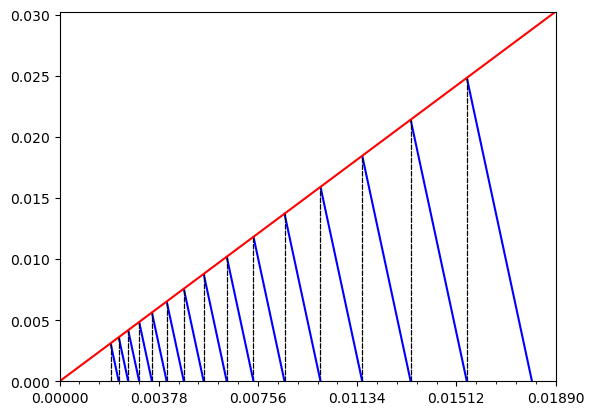

In [8]:
_, nb_stages= tl.LLE_cross_flow(R=100, E = 10, y_in = 0, xN = 0.002, x0 = 0.018, kD = 1.6)

print(f'Number of stages required: {nb_stages}')

**Limitation**:\
As explained above, certain assumptions had to be made to determine the number of stages in these separation processes. The code is therefore limited to certain cases where the requirements are fulfilled (diluted case and immiscible phases).

### pH Calculator 
This part of the project helps calculate either the pH or the required concentration of a solution containing an acid or a base. In the folder "pH.py", there are a list of 10 functions that divide each specific case of pH calculations as follow:
- **bufferpH** \
    Calculates the pH of a buffer solution using the concentrations of compounds and their acidity constant, in water

    input:
    - ca (float): The concentration of acid in mol/L
    - cb (float): The concentration of base in mol/L
    - pka (float): The pKa constant of the acid/base couple \
    **
    - Ka (float): Can be used instead of the pKa, the acidity constant of the couple
    - Kb (float): Can be used instead of the pka, The basicity constant of the couple 
    
    output:
    - pH (float): The pH of the solution as float
- **bufferconc** \
    Calculates the concentration of one compound for a buffer solution using the pH and the concentration of the other compound, in water

    input:
    - pH of the buffer solution
    - ca (float): The concentration of acid in mol/L
    - cb (float): The concentration of base in mol/L
    - pka (float): The pKa constant of the couple \
    **
    - Ka (float): Can be used instead of the pka, the acidity constant of the couple
    - Kb (float): Can be used instead of the pka, the basicity constant of the couple 

    output:
    - The missing concentration in mol/L as float
- **strongacidpH** \
    Calculates the pH of a solution of strong acid,in water

    input:
    - ca (float): The concentration of acid in mol/L

    output:
    - The pH of the solution as float
- **strongbasepH** \
    Calculates the pH of a solution of strong base, in water

    input:
    - cb (float): The concentration of base in mol/L

    output:
    - The pH of the solution as float 
- **strongacidconc** \
    Calculates the concentration of strong acid needed to achieve the pH indicated, in water

    input:
    - pH (float): The pH wanted in the solution

    output:
    - The concentration of strong acid needed in mol/L as float
- **strongbaseconc** \
    Calculates the concentration of strong acid needed to achieve the pH indicated, in water

    input:
    - pH (float): The pH wanted in the solution \
    **
    - pOH: Can be used instead of pH, the potential of hydroxide wanted

    output:
    - The concentration of strong base needed in mol/L as float
- **weakacidpH** \
    Calculates the pH of a solution of weak acid using the analytical concentration of acid and the acidity constant, in water

    input:
    - ca (float): The concentration of acid in mol/L
    - Ka (float): The acidity constant of the acid \
    **
    - pka (float): Can be used instead of Ka, the pKa of the acid

    output:
    - pH (float): The pH of the solution as a float
- **weakbasepH** \
    Calculates the pH of a solution of weak base using the analytical concentration of base and the acidity constant, in water

    input:
    - cb (float): The concentration of base in mol/L
    - Ka (float): The acidity constant of the base \
    **
    - pka (float): Can be used instead of Ka, the pKa of the base 
    - Kb (float): Can be used instead of Ka, the basicity constant of the base

    output:
    - pH (float): The pH of the solution as a float
- **weakacidconc** \
    Calculates the analytical concentration of weak acid needed to achieve the pH indicated using the pH and the acidity constant, in water

    input:
    - pH (float): The pH of the solution
    - Ka (float): The acidity constant of the compound \
    **
    - pka (float): Can be used instead of the Ka, the pKa of the compound

    output:
    - The concentration of weak acid needed in mol/L as a float
- **weakbaseconc** \
    Calculates the analytical concentration of weak base needed to achieve the pH indicated using the pH and the basicity consant, in water

    input:
    - pH (float): The pH of the solution
    - Kb (float): The basicity constant of the compound \
    **
    - pka (float): Can be used instead of the Kb, the pKa of the compound
    - Ka (float): Can be used instead of the Kb, the acidity constant of the compound

    output:
    - The concentration of weak base needed in mol/L as a float








Exemple of use:

In [9]:
import Toolbox.pH as tpH

concentration = 0.03

print(f"The pH of {concentration} mol/L of strong acid is {tpH.strongacidpH(ca=concentration)}")

The pH of 0.03 mol/L of strong acid is 1.5228787452755121


In [14]:
pH = 3.5
Ka = 1.8*10**(-5)

print(f"The concentration of acetic acid needed to achieve a pH of {pH} is {tpH.weakacidconc(pH=pH, Ka=Ka)} mol/L")

The concentration of acetic acid needed to achieve a pH of 3.5 is 0.005869926500650078 mol/L


**Limitation**: \
These functions only calculate the pH in a water solution. Even if it is the most current solvent, many organic solvents are often used in the laboratory. 

### Boiling Point at new Pressure
This part of the project is usefull to find the new boling point of a compound when the pressure of the environnement is different from the atmospheric pressure. In the Pressure_TB.py file, there are two functions presented as follows :

1.  **resolve_name_to_cas** \
The resolve_name_to_cas function takes a molecule name as input and returns the corresponding CAS (Chemical Abstracts Service) Registry   Number.

- Input :

   - `molecule_name` (str): The name of the chemical molecule.
- Output : 

   - `CAS` (str): The CAS number if found.
- Function workflow :
   
   - Constructing a URL for querying the [Common Chemistry](https://commonchemistry.cas.org) database using the molecule name.
   - Sending a GET request to the Common Chemistry service.
   - Analizing the response to locate and extract the CAS number.
   - Removing any unnecessary whitespace from the CAS number


2. **clausius_clapeyron_enthalpy** \
The clausis_clapeyron_enthalpy function calculates the new boiling point of a chemical substance at a given pressure using the Clausius-Clapeyron equation. 
This equation is fundamental in thermodynamics for understanding phase transitions, specifically the relationship between the pressure and temperature of a substance in its liquid and gas phases.

- Input :
   - `Pressure` (float): The pressure in bar.
   - `molecule_name` (str): The name of the chemical molecule.

- Output : 
   - Returns the new boiling temperature $T_{new}$ (float) in Kelvin at pressure P .

- Function workflow:
   - Resolve the Molecule Name to CAS Number:

      The function first calls `resolve_name_to_cas` to obtain the CAS (Chemical Abstracts Service) Registry Number for the given molecule name.

   - Retrieve Thermodynamic Properties:

      Using the `chemicals` package, the function retrieves several key thermodynamic properties for the molecule:
      - **Liquid Heat of Formation (`Hfl`):** The heat content of the compound in its liquid phase.
      - **Gas Heat of Formation (`Hfg`):** The heat content of the compound in its gaseous phase.
      - **Boiling Point (`Tb`):** The temperature at which the compound boils under standard atmospheric pressure.

   - Error Handling:

      The function checks if any of the retrieved properties are `None`. If any property is not available, it raises a `ValueError` indicating that the molecule is not supported by the `chemicals` package.

   - Calculate Latent Heat of Vaporization:

      The latent heat of vaporization is computed as the difference between the gas and liquid heat of formation: 

      $\Delta H_{vap} = H_{gas} - H_{liquid}$ 

   -  Apply the Clausius-Clapeyron Equation:

         The new boiling point at the specified pressure is calculated using the Clausius-Clapeyron equation: 

      ${T_{{new}}} = \frac{1}{\frac{1}{T} - \left( \frac{\ln(\frac{P}{1.01325}) \times 8.314}{\Delta H_{vap}} \right)}$

      Here, $T_{new}$ is the new boiling point at P, P is the input pressure in bar, T is the original boiling point and 8.314 is the gas constant in J/(mol·K).  

   - Return the New Boiling Point:

      The function returns the computed new boiling point temperature in Kelvin.


Example of use :

In [1]:
import Toolbox.Pressure_TB as PTB
molecule_name = "Benzene"
Pressure = 0.8
print (f"The boiling point of {molecule_name} at {Pressure} bar is {PTB.clausius_clapeyron_enthalpy(Pressure, molecule_name)} K")

The boiling point of Benzene at 0.8 bar is 346.1699136833751 K


**Limitations** : 

- Not all the molecules have a gas phase.
- The package chemicals may not have the liquid and gas heat of formation for some compounds. 
 

### Material Safety Data Sheet (MSDS) 
This part of the project is usefull to find the Material Safety Data Sheet (MSDS) of a chemical compound by searching in the [ChemBlink](https://www.chemblink.com/index.htm) website. In the MSDS.py file, there are a few functions usable, presented as follows :

1.  **resolve_name_to_cas** \
The resolve_name_to_cas function takes a molecule name as input and returns the corresponding CAS (Chemical Abstracts Service) Registry   Number.

- Input :

   - `molecule_name` (str): The name of the chemical molecule.
- Output : 

   - Returns the `CAS` (str) number if found.

- Function workflow :
   
   - Constructing a URL for querying the [Common Chemistry](https://commonchemistry.cas.org) database using the molecule name.
   - Sending a GET request to the Common Chemistry service.
   - Analizing the response to locate and extract the CAS number.
   - Removing any unnecessary whitespace from the CAS number



2. **new_list_companies** \
The `new_list_companies` function identifies a list of companies that provide the material safety data sheet (MSDS) for a given molecule. It searches in a specific website for this information. The website is called [ChemBlink](https://www.chemblink.com/index.htm).  

- Input :

   - `molecule_name` (str): The name of the chemical molecule.

-Output : 

   - Returns a list of companies (list of str) that provide the MSDS.
   

- Function workflow:
   - Resolve the Molecule Name to CAS Number:

      The function first calls `resolve_name_to_cas` to obtain the CAS (Chemical Abstracts Service) Registry Number for the given molecule name.

   - Constructing a URL to access the MSDS information for the molecule.

   - Sending a GET request to retrieve the MSDS page from the specified URL.
   
   - Searches the HTML content of the response for mentions of specific chemical companies.

   - Adds any found companies to a list of successful companies.



3. **display_pdf_images** \
The `display_pdf_images` function retrieves a PDF document from a specified URL. It searches in a specific website for the PDF,The website is called [ChemBlink](https://www.chemblink.com/index.htm). Then, it converts the PDF pages into images, and merges these images vertically into a single image.

- Input :

   - `molecule_name` (str): The name of the chemical molecule.
   - `company` (str): The name of the company providing the MSDS.

-Output : 

   - Returns the merged image (PIL.Image object), or None if the PDF retrieval fails.

- Function workflow:
   - Resolve the Molecule Name to CAS Number:

      The function first calls `resolve_name_to_cas` to obtain the CAS (Chemical Abstracts Service) Registry Number for the given molecule name.

   - Constructing a URL to access the PDF document for the specified molecule and company.

   - Sending a GET request to retrieve the PDF from the constructed URL..
   
   - If the request is successful (i.e., status code 200), the function converts the PDF pages into images using the `convert_from_bytes` function from the `pdf2image` library.

   - Adds any found companies to a list of successful companies.

   - The function merges the list of images vertically using `merge_images_vertically`.





